# Lab Solution 09 - Extended Exercises on Clustering

One of the key parameters in spectral clustering is the gamma parameter of the RBF kernel used to compute the similarity matrix. The gamma parameter controls the width of the Gaussian kernel and can have a significant impact on the clustering results, particularly in the presence of outliers.

In this lab, we will explore the impact of the gamma parameter on the clustering results. 

In [3]:
import requests

exec(requests.get("https://courdier.pythonanywhere.com/get-send-code").content)

npt_config = {
    'session_name': 'lab-10',
    'session_owner': 'mlbd',
    'sender_name': input("Your name: "),
}

Your name:  


### Task 1: Generate a dataset with outliers.
Complete the function generate_data_with_outliers and plot the clusters and outliers.

Hint: You may use the function make_blobs from scikit-learn.

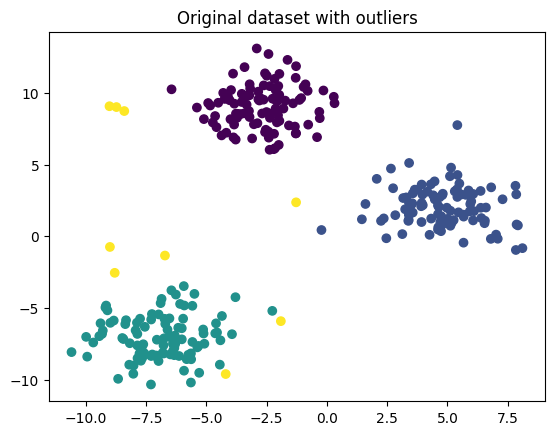

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

groups = 3
samples = 30
percentage_outliers = 0.3
cluster_std = 1.5

def generate_data_with_outliers(groups, samples, percentage_outliers,
                                cluster_std = cluster_std):
    """Generate synthetic data with outliers for clustering.

    Parameters
    ----------
    groups : int
        The number of groups or clusters in the generated data.
    samples : int
        The total number of samples to be generated, including the outliers.
    percentage_outliers : float
        The percentage of outliers to be included in the generated data, as a float between 0 and 1.
    cluster_std (optional): float
        Standard deviation parameter for make_blobs
    Returns
    -------
    X : numpy.ndarray, shape (samples, 2)
        The generated data points, including the outliers.
    y : numpy.ndarray, shape (samples,)
        The labels assigned to each data point, including the outliers. The label values are integers from 0 to
        `groups`, and the outliers are assigned the value `groups+1`.
    """
    X, y = make_blobs(n_samples=300, centers=groups, cluster_std = cluster_std,
                      random_state=42)
    outliers = np.random.rand(int(samples*percentage_outliers), 2) * 20 - 10

    X = np.vstack([X, outliers])
    y = np.concatenate([y, np.full((outliers.shape[0],), groups+1)])
    return X, y

# Plot the dataset
X, y = generate_data_with_outliers(groups, samples, percentage_outliers,
                                cluster_std = cluster_std)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title("Original dataset with outliers")
send(plt, 1)
plt.show()

## Task 2: Perform spectral clustering with different gamma values 

Perform spectral clustering with different gamma values (e.g., 0.01, 0.1, 1, 10, and 100). Plot the clustering results for each gamma value and display the silhouette score for each clustering.

In [5]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Perform spectral clustering with different gamma values
gamma_values = [0.01, 0.1, 1, 10, 100]

def plot_spectral_clustering(X, groups, gamma_values):
    """
    Perform spectral clustering with different gamma values on the input dataset X, 
    and plot the clustering results for each gamma value along with the corresponding silhouette score.
    
    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        The input dataset to perform clustering on.
        
    groups : int
        The number of groups to cluster the input data into.
    
    gamma_values : list of floats
        The gamma values to use for spectral clustering. Each gamma value will result in one plot in the
        output figure.
    
    Returns:
    --------
    None
        The function generates a plot with subplots for each gamma value, showing the clustering results and
        the silhouette score for each clustering.
    """
    fig, axs = plt.subplots(2, len(gamma_values)//2, figsize=(15, 10))
    
    for i, gamma in enumerate(gamma_values):
        row = i // (len(gamma_values)//2)
        col = i % (len(gamma_values)//2)

        y_pred = SpectralClustering(n_clusters=groups, gamma=gamma).fit_predict(X)
        score_s = silhouette_score(X, y_pred)
        axs[row, col].scatter(X[:, 0], X[:, 1], c=y_pred)
        axs[row, col].set_title(f"Gamma = {gamma}. Silhouette Score = {score_s}")

    plt.show()

### Task 3: Explore the different parameters
How do the results vary with greater/smaller percentage of outliers? 
What is the effect of the clustering standard deviation? 
How is the effect of the group size (sample)?

In [6]:
answer = """
How do the results vary with greater/smaller percentage of outliers? 
"""
send(answer, 31)

answer = """
What is the effect of the clustering standard deviation? 
"""
send(answer, 32)

answer = """
How is the effect of the group size (sample)?
"""
send(answer, 33)


<Response [200]>